# San Francisco Housing Rental Analysis


In [16]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [17]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

## Load Data

In [18]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In [19]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_mean = sfo_data["housing_units"].groupby(sfo_data.index).mean()
sfo_mean

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [20]:
y_max = sfo_mean.max()
y_min = sfo_mean.min()
y_std = sfo_mean.std()
y_min

372560

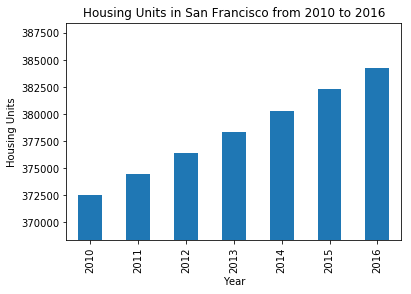

In [21]:
fig_housing_units = plt.figure()
sfo_plot = sfo_mean.plot.bar()
sfo_plot.set_title("Housing Units in San Francisco from 2010 to 2016")
sfo_plot.set_xlabel("Year")
sfo_plot.set_ylabel("Housing Units")
sfo_plot.set_ylim(y_min-y_std, y_max+y_std)
plt.show()
plt.close(fig_housing_units)

- - - 

## Average Prices per Square Foot


### Average Gross Rent in San Francisco Per Year

In [22]:
sfo2_mean = sfo_data[["sale_price_sqr_foot", "gross_rent"]].groupby(sfo_data.index).mean()
sfo2_mean

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [23]:
# Calculate the average gross rent and average sale price per square foot

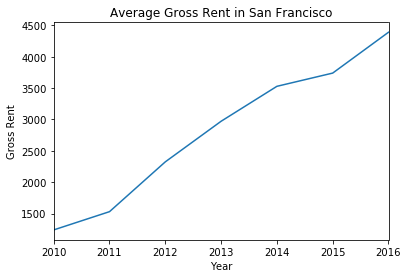

In [25]:
fig_housing_units = plt.figure()
sfo2_plot = sfo2_mean["gross_rent"].plot()
sfo2_plot.set_title("Average Gross Rent in San Francisco")
sfo2_plot.set_xlabel("Year")
sfo2_plot.set_ylabel("Gross Rent")
# sfo2_plot.set_ylim(y_min-y_std, y_max+y_std)
plt.show()
plt.close(fig_housing_units)

### Average Sales Price per Year

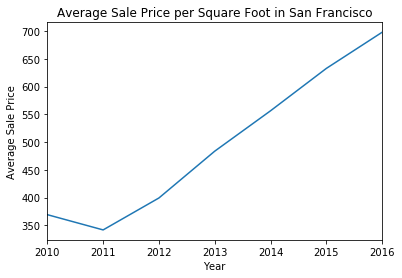

In [26]:
fig_housing_units = plt.figure()
sfo3_plot = sfo2_mean["sale_price_sqr_foot"].plot()
sfo3_plot.set_title("Average Sale Price per Square Foot in San Francisco")
sfo3_plot.set_xlabel("Year")
sfo3_plot.set_ylabel("Average Sale Price")
# sfo2_plot.set_ylim(y_min-y_std, y_max+y_std)
plt.show()
plt.close(fig_housing_units)

- - - 

## Average Prices by Neighborhood


In [27]:
sfo3_mean = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean().reset_index()
sfo3_mean.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [28]:
# Group by year and neighborhood and then create a new dataframe of the mean values
sfo3_plot = sfo3_mean.hvplot.line("year", "sale_price_sqr_foot", xlabel="Year", ylabel="Daily Return", groupby="neighborhood")
sfo3_plot

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [29]:
sfo4_mean = sfo_data.groupby("neighborhood").mean().reset_index()
sfo4_mean.sort_values("sale_price_sqr_foot", ascending=False, inplace=True)
sfo4_mean = sfo4_mean.head(10)
sfo4_mean

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
65,Union Square District,903.993258,377427.50,2555.166667
36,Merced Heights,788.844818,380348.00,3414.000000
38,Miraloma Park,779.810842,375967.25,2155.250000
51,Pacific Heights,689.555817,378401.00,2817.285714
71,Westwood Park,687.087575,382295.00,3959.000000
63,Telegraph Hill,676.506578,378401.00,2817.285714
57,Presidio Heights,675.350212,378401.00,2817.285714
10,Cow Hollow,665.964042,378401.00,2817.285714
56,Potrero Hill,662.013613,378401.00,2817.285714
60,South Beach,650.124479,375805.00,2099.000000


In [30]:
# Plotting the data from the top 10 expensive neighborhoods
sfo4_plot = sfo4_mean.hvplot.bar("neighborhood", "sale_price_sqr_foot", xlabel="Year", ylabel="Daily Return", rot=90)
sfo4_plot

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [31]:
px.parallel_coordinates(sfo4_plot, color='index')

NotImplementedError: Iteration on Elements is not supported.

In [ ]:
# Parallel Coordinates Plot

In [ ]:
# Parallel Categories Plot


- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [ ]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [ ]:
# Calculate the mean values for each neighborhood


In [ ]:
# Join the average values with the neighborhood locations


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [ ]:
# Create a scatter mapbox to analyze neighborhood info


# San Francisco Rental Prices Dashboard

In [ ]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv


In [ ]:
# Set up API credentials
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv('mapbox')

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

In [ ]:
# Import the CSVs to Pandas DataFrames
file_path = Path("neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
sfo_data.head()
df_neighborhood_locations.head()

**Panel Visualizations**

In [ ]:
import pandas as pd
import numpy as np
import panel as pn
from panel.interact import interact
from panel import widgets
import hvplot.pandas

# Enable Jupyter Lab Panel plugin
pn.extension()

# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    

def average_sales_price():
    """Average Sales Price Per Year."""
    
    

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    

def parallel_categories():
    """Parallel Categories Plot."""
    
    

def neighborhood_map():
    """Neighborhood Map"""
    
    

**Panel Dashboard In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!**


In [ ]:

    # Define function to create plot
def plot_housing_tx(number_of_sales):
    housing_transactions = pd.DataFrame(
        {
            "years": np.random.randint(2010, 2019, number_of_sales),
            "sales": np.random.randint(53, 500, number_of_sales),
            "foreclosures": np.random.randint(10, 147, number_of_sales),
        }
    ).sort_values(["years", "sales"])

    return housing_transactions.hvplot.scatter(
        x="sales",
        y="foreclosures",
        c="years",
        colormap="viridis",
        title="Alleghany, PA Housing Transactions",
    )

**Serve the Panel Dashboard**

In [ ]:
#   panel.servable()
# Render plot with Panel interactive widget
interact(plot_housing_tx, number_of_sales=100)